In [1]:
#from __future__ import absolute_import, division, print_function
#from fmz import * # 导入所有FMZ函数

#from pandas import *
import pandas as pd
import numpy as np

# Display and Plotting
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文现实问题
plt.rcParams['axes.unicode_minus']=False # 解决负号显示异常的问题

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.graphics.api import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
import scipy.stats as scs


# import arch
from arch import arch_model
#import talib
import json
from urllib import request
from math import sqrt

from datetime import datetime
from dateutil.parser import parse

from datetime import timedelta
from itertools import product
import warnings
warnings.simplefilter('ignore')

In [2]:
from pycopula import copula
from pycopula.copula import ArchimedeanCopula
from pycopula.visualization import concentrationFunction
from pycopula.simulation import simulate

In [3]:
#导入数据
rawdata = pd.read_excel('./Dataset/Copula_network_data/zhongxin_index1.xlsx',sheet_name="data0")
dataframe1 = rawdata.iloc[:,1:].apply(np.log).iloc[:-1,:]
dataframe2 = rawdata.iloc[:,1:].apply(np.log).iloc[1:,:]
column_name = dataframe1.columns.values
logreturns = pd.DataFrame((np.array(dataframe2)-np.array(dataframe1)), columns=column_name)
logreturns['time'] = np.array(rawdata.iloc[1:,0])
logreturns['time']= pd.to_datetime(logreturns['time'])
# logreturns.index.name = 'time'
logreturns.timestamp=pd.to_datetime(logreturns.time,format='%Y-%m-%d')
logreturns.index=logreturns.timestamp
logreturns

,Petroleum,Coal,Metals,Utilities,Steel,Chemicals,Architecture,Building,Manufacturing,Mechanics,...,Agriculture,Bank,NonBank,RealEstate,Transportation,Electronics,Communication,Computer,Media,time
time,,,,,,,,,,,,,,,,,,,,,
2005-01-09,-0.010252,-0.006756,-0.006836,-0.006363,-0.003962,-0.008676,-0.005448,-0.004504,-0.008764,-0.006756,...,-4.478112e-03,-0.003859,-0.004364,-0.006069,-0.007013,-0.010301,-0.005711,-0.002457,-0.002692,2005-01-09
2005-01-16,-0.046450,-0.079816,-0.030976,-0.017534,-0.030522,-0.007338,0.004032,-0.003427,0.005202,-0.005976,...,3.744042e-03,-0.023285,0.004513,0.039942,-0.002903,0.026756,-0.004238,0.023652,0.033345,2005-01-16
2005-01-23,-0.048484,-0.005348,-0.009448,-0.013404,0.004388,0.000060,-0.005955,-0.009629,-0.003564,-0.003452,...,-6.775658e-03,0.001960,-0.038283,-0.010489,-0.003712,-0.019432,0.004704,-0.018975,-0.026518,2005-01-23
2005-01-30,0.011120,0.015948,0.027997,-0.005067,0.042421,0.010096,0.022741,0.034105,-0.001176,0.028706,...,1.303324e-02,0.055035,0.006136,0.039086,0.006071,0.037025,0.053759,0.021442,0.017244,2005-01-30
2005-02-06,-0.035541,-0.024438,-0.052201,-0.045901,-0.025799,-0.044143,-0.058983,-0.061847,-0.058974,-0.041854,...,-6.473672e-02,-0.043349,-0.108451,-0.038555,-0.031856,-0.096820,-0.056156,-0.096773,-0.068895,2005-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-07,-0.062602,-0.056606,-0.094983,0.006982,0.003152,-0.061707,-0.001302,-0.051175,-0.052648,-0.038331,...,-6.988204e-02,-0.037628,-0.014494,0.046181,-0.024063,-0.041140,-0.019428,-0.060108,-0.043300,2021-03-07
2021-03-14,0.007926,0.050945,-0.025834,0.038036,0.089227,-0.010947,0.023769,0.005771,0.016847,0.006215,...,-8.613608e-07,0.018759,0.003005,-0.015191,-0.012108,0.021716,0.008436,0.006826,0.025848,2021-03-14
2021-03-21,-0.043796,0.009408,-0.013904,0.041598,0.033838,-0.026167,-0.000606,-0.008126,-0.038564,-0.054502,...,-7.447674e-02,-0.001569,-0.030519,-0.013480,-0.000330,-0.085446,-0.053257,-0.077533,-0.058899,2021-03-21


In [4]:
#行业列表
industry = []
industry.extend(logreturns.columns.values)
industry.pop()
industry

['Petroleum',
 'Coal',
 'Metals',
 'Utilities',
 'Steel',
 'Chemicals',
 'Architecture',
 'Building',
 'Manufacturing',
 'Mechanics',
 'Energy',
 'Defense',
 'Automobile',
 'Commerce',
 'Consumer',
 'Household',
 'Clothing',
 'Medicine',
 'Food',
 'Agriculture',
 'Bank',
 'NonBank',
 'RealEstate',
 'Transportation',
 'Electronics',
 'Communication',
 'Computer',
 'Media']

In [5]:
### 偏t分布-EGARCH模型，并提取标准化残差数据
copula_data_skewt=pd.DataFrame(columns=industry)
for i in industry: 
    vars()['skewt_trained_EGARCH_'+ i] = arch_model(logreturns[i], mean='AR', vol='EGARCH', lags=4, p=1, o=1,q=1, dist='skewt')
    vars()['skewt_res_EGARCH_'+ i] = vars()['skewt_trained_EGARCH_'+ i].fit(disp=False, options={'ftol': 1e-01})
    
    #标准化残差数据
    copula_data_skewt[i] = vars()['skewt_res_EGARCH_'+ i].std_resid
    
copula_data_skewt

Iteration:      1,   Func. Count:     13,   Neg. LLF: 17296.76685199181
Iteration:      1,   Func. Count:     13,   Neg. LLF: 89662.96145573516
Iteration:      1,   Func. Count:     13,   Neg. LLF: 161745.96006792685
Iteration:      1,   Func. Count:     13,   Neg. LLF: 82014.21662022147
Iteration:      1,   Func. Count:     13,   Neg. LLF: 17762.9107875335
Iteration:      1,   Func. Count:     13,   Neg. LLF: 10721.90834095524
Iteration:      1,   Func. Count:     13,   Neg. LLF: 226989.78955578853
Iteration:      1,   Func. Count:     13,   Neg. LLF: 106433.55820561385
Iteration:      1,   Func. Count:     13,   Neg. LLF: 13008.661274191734
Iteration:      1,   Func. Count:     13,   Neg. LLF: 103585.78521648006
Iteration:      1,   Func. Count:     13,   Neg. LLF: 190216.1765876907
Iteration:      1,   Func. Count:     13,   Neg. LLF: 119590.43753242577
Iteration:      1,   Func. Count:     13,   Neg. LLF: 14217.31274199218
Iteration:      1,   Func. Count:     13,   Neg. LLF: 5519.

,Petroleum,Coal,Metals,Utilities,Steel,Chemicals,Architecture,Building,Manufacturing,Mechanics,...,Food,Agriculture,Bank,NonBank,RealEstate,Transportation,Electronics,Communication,Computer,Media
time,,,,,,,,,,,,,,,,,,,,,
2005-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-06,-1.265263,-0.491355,-1.204272,-1.208746,-1.599266,-1.152725,-1.452141,-1.542015,-1.646046,-1.077068,...,-1.174088,-1.788986,-0.914660,-1.626433,-1.003290,-0.927931,-1.869425,-1.704854,-1.958458,-1.598049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-07,-1.641789,-1.350575,-1.690513,0.210607,-1.689068,-1.584191,-0.147309,-1.702929,-1.752793,-1.276408,...,-3.043013,-1.571759,-1.241219,-0.392800,1.419766,-0.805190,-1.096766,-0.637818,-1.380488,-1.169141
2021-03-14,-0.206095,1.069967,-0.363920,1.291467,2.705080,-0.330240,0.583598,0.005828,0.397233,0.021666,...,-1.179874,-0.100933,0.237788,-0.049089,-0.517868,-0.488657,0.375212,0.128343,0.141349,0.656453
2021-03-21,-0.969343,0.046612,-0.041304,1.386578,-0.134051,-0.523422,-0.129988,-0.166301,-1.172661,-1.446912,...,-0.724622,-1.544920,-0.087922,-0.916318,-0.533030,0.020099,-1.922290,-1.344055,-1.637935,-1.477255


In [6]:
###定义copula函数类型
gumbel = ArchimedeanCopula(family="gumbel", dim=2)
clayton = ArchimedeanCopula(family="clayton", dim=2)
frank = ArchimedeanCopula(family="gumbel", dim=2)

In [7]:
#偏t分布-copula拟合
paramX3 = { 'df': 7.474382, 'nc': None }            
paramX4 = { 'df': 8.549435, 'nc': None }            
hyperParams_nct = [ paramX3, paramX4 ]     
bound3 = [-1,1]             # 好像只有一个参数可以是未知的，进而设定范围？？？
bound4 = [-1,1]
bounds_nct = [ bound3, bound4 ]  

#分布类型
t = scs.t                  
skewt = scs.nct  

yy = np.array(copula_data_skewt.iloc[:,0:2].dropna(axis=0))
# Fitting copula with MLE method and Gamma/Exp marginals distributions
gumbel.fit(yy, method='mle', marginals=[skewt,skewt], hyper_param=hyperParams_nct, hyper_param_bounds=bounds_nct)


####这一串ok的作用是什么？我在estimation文件里mle函数里找到它，想在源码里去掉可以嘛？（-捂脸哭 -别哭当然可以改了，肯定是当时调试代码时作者没改过来）
#（不过这个问题比较复杂嘻嘻，哥哥肯定不想看，嘻嘻）

(1.9812066467915241,
 array([{'df': 7.474382, 'nc': -0.4251695156673613},
        {'df': 8.549435, 'nc': -0.028027153783354148}], dtype=object))

In [13]:
np.asarray(hyperParams_nct)

array([{'df': None, 'nc': None}, {'df': None, 'nc': None}], dtype=object)

In [24]:
#偏t分布-copula拟合
paramX3 = { 'df': None, 'nc': None }            
paramX4 = { 'df': None, 'nc': None }            
hyperParams_nct = [ paramX3, paramX4 ]     
           
bound3 = [-1,1]                 # 怎么对两个参数设定范围啊？ 
bound4 = [-1,1]                # 是只有一个参数可以是未知的，进而设定范围？？？
bounds_nct =[bound3,bound3]  


#分布类型
t = scs.t                  
skewt = scs.nct  

yy = np.array(copula_data_skewt.iloc[:,0:2].dropna(axis=0))
# Fitting copula with MLE method and Gamma/Exp marginals distributions
gumbel.fit(yy, method='mle', marginals=[skewt,skewt], hyper_param=hyperParams_nct, hyper_param_bounds=bounds_nct)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [15]:
	hyperParams = np.asarray(hyperParams_nct)
	hyperOptimizeParams = np.copy([ dic.copy() for dic in hyperParams ]) # Hyper-parameters during optimization will be stored here
	hyperStart = np.asarray(hyper_param_start)
	n, d = X.shape
	
	# We get the initialization vector of the optimization algorithm
	thetaOffset = len(theta_start)
	start_vector = np.repeat(0, d + thetaOffset)
	start_vector[0:thetaOffset] = theta_start
	if hyper_param_start == None:
		start_vector[thetaOffset:] = [ 1.0 for i in range(d) ]
	
	# The hyper-parameters that need to be fitted
	optiVector = []
	idx = 1
	
	# Each element of hyperParams is a dictionary
	for k in range(len(hyperParams)):
		for key in hyperParams[k]:
			optiVector.append(hyperParams[k][key])
			# If we have a start value for this specified unknown parameter
			if hyper_param_start != None and hyperParams[k][key] != None:
				start_vector[idx] = hyperStart[k][key]
				idx += 1
	
	# The global log-likelihood to maximize
	def log_likelihood(x):
		lh = 0
		idx = 1
		
		for k in range(len(hyperParams)):
			for key in hyperParams[k]:
				# We need to replace None hyper-parameters with current x value of optimization algorithm
				if hyperParams[k][key] == None:
					hyperOptimizeParams[k][key] = x[idx]
					idx += 1

		marginCDF = [ marginals[j].cdf(np.transpose(X)[j], **hyperOptimizeParams[j]) for j in range(d) ]
		marginCDF = np.transpose(marginCDF)
		# The first member : the copula's density
		if thetaOffset == 1:
			lh += sum([ np.log(copula.pdf_param(marginCDF[i], x[0])) for i in range(n)])
		else:
			lh += sum([ np.log(copula.pdf_param(marginCDF[i], x[0:thetaOffset])) for i in range(n)])
		# The second member : sum of PDF
		lh += sum([ sum(np.log(marginals[j].pdf(np.transpose(X)[j], **hyperOptimizeParams[j]))) for j in range(d) ])
		return lh
	
	# Optimization result will be stored here
	# In case whether there are bounds conditions or not, we use different methods or arguments
	optimizeResult = None
	if hyper_param_bounds == None:
		if theta_bounds == None:
			optimizeResult = minimize(lambda x: -log_likelihood(x), start_vector, method = optimize_method)
		else:
			optiBounds = np.vstack((np.array([theta_bounds]), np.tile(np.array([None, None]), [d, 1]) ))
			optimizeResult = minimize(lambda x: -log_likelihood(x), start_vector, method = bounded_optimize_method, bounds=optiBounds)
	else:
		if theta_bounds == None:
			optiBounds = np.vstack((np.array([None, None]), np.tile(np.array([None, None]), [d, 1]) ))
			optimizeResult = minimize(lambda x: -log_likelihood(x), start_vector, method = bounded_optimize_method, bounds=optiBounds)
		else:
			optiBounds = np.vstack((np.array([theta_bounds]), hyper_param_bounds))
			optimizeResult = minimize(lambda x: -log_likelihood(x), start_vector, method = bounded_optimize_method, bounds=optiBounds)
	

NameError: name 'hyper_param_start' is not defined

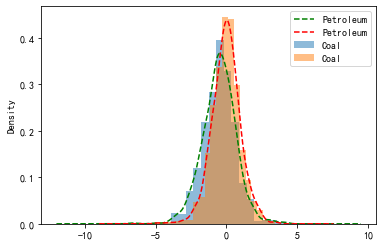

In [16]:
#绘制密度直方图
ax1=copula_data_skewt.iloc[:,0].plot.hist(stacked=True, bins=20, alpha=0.5,legend=True,density=1)
ax11= copula_data_skewt.iloc[:,0].plot.kde(style='g--',legend=True,ax=ax1)

ax2=copula_data_skewt.iloc[:,1].plot.hist(stacked=True, bins=20,alpha=0.5,density=1,legend=True,ax=ax11)
ax12=copula_data_skewt.iloc[:,1].plot.kde(style='r--',legend=True,ax=ax2)

###图例乱套了呜呜呜

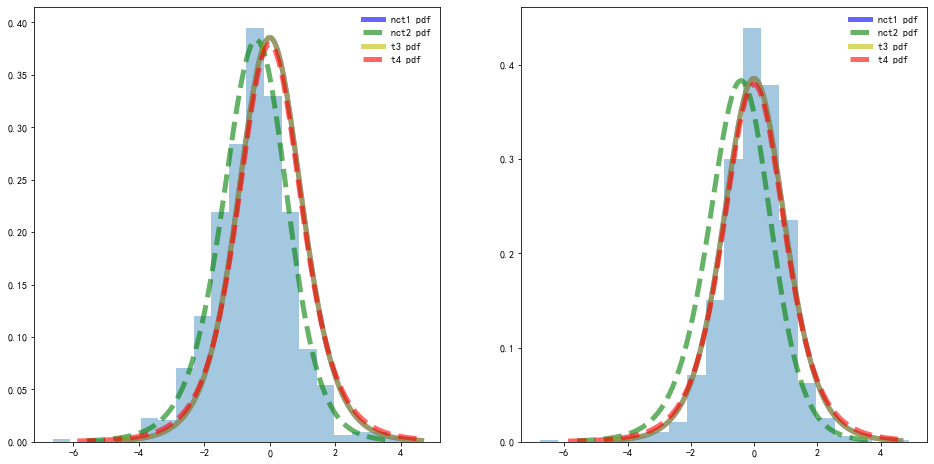

In [17]:
from scipy.stats import nct, t

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# fig,ax = plt.subplots()等价于：
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)


##########石油样本
#偏t分布参数1
df1, nc1 = 7.47438, -1.33472e-05
x1 = np.linspace(nct.ppf(0.001, df1, nc1),nct.ppf(0.999, df1, nc1), 100)
ax1.plot(x1, nct.pdf(x1, df1, nc1),'b-', lw=5, alpha=0.6, label='nct1 pdf')

#偏t分布参数2  （最好）
df2, nc2 = 7.47438, -0.45304900935714615
x2 = np.linspace(nct.ppf(0.001, df2, nc2),nct.ppf(0.999, df2, nc2), 100)
ax1.plot(x2, nct.pdf(x2, df2, nc2),'g--', lw=5, alpha=0.6, label='nct2 pdf')

#t分布参数3(类似偏t分布参数1)
df3 = 7.47438
x3 = np.linspace(t.ppf(0.001, df3),t.ppf(0.999, df3), 100)
ax1.plot(x3, t.pdf(x3, df3),'y-', lw=5, alpha=0.6, label='t3 pdf')

#t分布参数4
df4 = 5.013193675256858
x4 = np.linspace(t.ppf(0.001, df4),t.ppf(0.999, df3), 100)
ax1.plot(x4, t.pdf(x4, df4),'r--', lw=5, alpha=0.6, label='t4 pdf')

#石油样本分布直方图
yy0 = copula_data_skewt.iloc[:,0]
ax1.hist(yy0, density=True, histtype='stepfilled',bins=20,alpha=0.4)  #label='样本分布直方图'

ax1.legend(loc='best', frameon=False)



##########煤炭样本(参数略)

#偏t分布参数1
x1 = np.linspace(nct.ppf(0.001, df1, nc1),nct.ppf(0.999, df1, nc1), 100)
ax2.plot(x1, nct.pdf(x1, df1, nc1),'b-', lw=5, alpha=0.6, label='nct1 pdf')

#偏t分布参数2  
x2 = np.linspace(nct.ppf(0.001, df2, nc2),nct.ppf(0.999, df2, nc2), 100)
ax2.plot(x2, nct.pdf(x2, df2, nc2),'g--', lw=5, alpha=0.6, label='nct2 pdf')

#t分布参数3(类似偏t分布参数1)
x3 = np.linspace(t.ppf(0.001, df3),t.ppf(0.999, df3), 100)
ax2.plot(x3, t.pdf(x3, df3),'y-', lw=5, alpha=0.6, label='t3 pdf')

#t分布参数4
x4 = np.linspace(t.ppf(0.001, df4),t.ppf(0.999, df3), 100)
ax2.plot(x4, t.pdf(x4, df4),'r--', lw=5, alpha=0.6, label='t4 pdf')

#石油样本分布直方图
yy1= copula_data_skewt.iloc[:,3]
ax2.hist(yy1, density=True, histtype='stepfilled',bins=20,alpha=0.4)  #label='样本分布直方图'

ax2.legend(loc='best', frameon=False)


plt.show()

##怎么分别加个图标题啊
##怎么给直方图加图例啊